## 0. Setting

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.chdir('/content/gdrive/My Drive/ringle')

## 1. 텍스트 데이터 불러오기

In [4]:
data = pd.read_csv('blog review3.csv', encoding='cp949')

In [5]:
data

,review,출처
0,좋은 교재 링글 교재는 크게 일상대화 / 비즈니스 / 주니어 / 자유주제로 나뉘는데...,[출처] [내돈내산] 아이비리그출신과 화상영어! 링글 Ringle 솔직 후기 / 링...
1,확실히 직장에서 영어를 많이 사용하는만큼 저에게 최적의 서비스라는 생각이 들어요!,NaN
2,먼저 예습!! 링글을 결제하기 전에 저역시 공부해본 분들의 후기를 꼼꼼히 읽어봤는데...,NaN
3,"하지만 (게으른)저는 처음에 몇번 해보다가,,, 시간이 좀 걸리길래 >_<그냥 아티...",NaN
4,모르는 단어들 체크해 놓고 관련 영상/기사 찾아보기... 요 링글 본연의 기능에만 ...,NaN
...,...,...
209,"수업 전에도 예습 할 내용을 꽤 오래 정리해 가야하고, 수업 중엔 구닥에 튜터가 다...",NaN
210,"모두 사용자 스스로 정리하고, 공부하고, 습득해내야합니다. 1:1 수업은 튜터가 너...",NaN
211,자료나 컨텐츠들이 정리되면 좋겠어요!! 좀 중구난방인 느낌도 있고... 사용하기 복...,NaN
212,학습이든 컨텐츠든 전반적으로 정리가 필요해 보입니다.,NaN


In [6]:
data = data.drop('출처', axis=1)

In [7]:
data['review'][0]

'좋은 교재 링글 교재는 크게 일상대화 / 비즈니스 / 주니어 / 자유주제로 나뉘는데요, 저는 주로 일상대화와 자유주제에서 교재를 선택합니다!! 날짜를 보시면 아시겠지만 매달 업데이트 되고있어요. 주제별로 키워드 검색도 가능하구요! 자유주제에서는 영문이력서, 영어면접 준비, 영어발표준비 등 본인의 자료를 업로드 해 수업을 하면서 네이티브가 아니라서 겪는 문제들을 튜터와 함께 해결할 수 있어요!!'

# 2. 텍스트 데이터 정제하기

In [8]:
data['review'] = data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
data[:5]

,review
0,좋은 교재 링글 교재는 크게 일상대화 비즈니스 주니어 자유주제로 나뉘는데요 저...
1,확실히 직장에서 영어를 많이 사용하는만큼 저에게 최적의 서비스라는 생각이 들어요
2,먼저 예습 링글을 결제하기 전에 저역시 공부해본 분들의 후기를 꼼꼼히 읽어봤는데요 ...
3,하지만 게으른저는 처음에 몇번 해보다가 시간이 좀 걸리길래 그냥 아티클을 수업전 읽고
4,모르는 단어들 체크해 놓고 관련 영상기사 찾아보기 요 링글 본연의 기능에만 충실하는...


In [9]:
reviews = [] #리스트로 저장
for i in range(len(data)):
  review = data['review'][i]
  reviews.append(review)

In [10]:
reviews[0]

'좋은 교재 링글 교재는 크게 일상대화  비즈니스  주니어  자유주제로 나뉘는데요 저는 주로 일상대화와 자유주제에서 교재를 선택합니다 날짜를 보시면 아시겠지만 매달 업데이트 되고있어요 주제별로 키워드 검색도 가능하구요 자유주제에서는 영문이력서 영어면접 준비 영어발표준비 등 본인의 자료를 업로드 해 수업을 하면서 네이티브가 아니라서 겪는 문제들을 튜터와 함께 해결할 수 있어요'

In [11]:
text=''
for i in range(len(reviews)):
  text = text + " " + (reviews[i])

text

' 좋은 교재 링글 교재는 크게 일상대화  비즈니스  주니어  자유주제로 나뉘는데요 저는 주로 일상대화와 자유주제에서 교재를 선택합니다 날짜를 보시면 아시겠지만 매달 업데이트 되고있어요 주제별로 키워드 검색도 가능하구요 자유주제에서는 영문이력서 영어면접 준비 영어발표준비 등 본인의 자료를 업로드 해 수업을 하면서 네이티브가 아니라서 겪는 문제들을 튜터와 함께 해결할 수 있어요 확실히 직장에서 영어를 많이 사용하는만큼 저에게 최적의 서비스라는 생각이 들어요 먼저 예습 링글을 결제하기 전에 저역시 공부해본 분들의 후기를 꼼꼼히 읽어봤는데요 어느 한 분이   먼저 듣고  한글버전  영어로 작문  내 작문과 본문 비교 이렇게 예습을 하면 효과가 좋다고 하더라구요 하지만 게으른저는 처음에 몇번 해보다가 시간이 좀 걸리길래 그냥 아티클을 수업전 읽고 모르는 단어들 체크해 놓고 관련 영상기사 찾아보기 요 링글 본연의 기능에만 충실하는 것에만  만족을 하고 있습니다 ㅎㅎ 그다음은 수업방식 설정입니당 수업전 자신이 수업방식을 설정하면 저의 경우 수업설정을 주로  토론으로 하는편인데요  인경우보다 튜터님이 말을 많이 하시지만 생각을 많이 나눌 수 있어서 전 더 좋더라구요 워낙 다양한 사람들의 생각을 듣는걸 좋아해서 ㅎㅎ 또 듣기도 영어공부잖아요 튜터가 수업전에 이 설정을 숙지하고 들어옵니다 수업전에 한번더 내가 어느 부분에 집중하고 싶은지 체크하고 수업이 시작됩니다 수업 중에는 선생님과 으로 화상전화를 하면서 선생님이 제 말을  에 실시간으로 타이핑을 해주십니다 저는 제가 예습때 선택했던 질문들 그에 대한 답변을 미리 작성해 놨더라면 그 답변도 볼수 있어요 하지만 전 보면서 읽는 것보다 조금 더  한 스피킹을 위해 쓰지는 않고 무슨 말 할지 생각만 하거나 노트에 간단하게 정리하는걸 추천드려용  이건 튜터분들 마다 방식이 좀 다른데 제가 했던 말들을 다 에 적어놓고 수업 끝나기 전에 한꺼번에 문장 수정을 해주시는 분들이 있고 수업이 끝나고 따로  문서밑에 설명를 받을 수 있는데 

In [12]:
! pip install konlpy
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import wordcloud

def get_noun(text):
  okt = Okt()
  noun = okt.nouns(text)
  for i,v in enumerate(noun):
    if len(v)<2:
      noun.pop(i)
  count = Counter(noun)
  noun_list = count.most_common(100)

  return noun_list

     |████████████████████████████████| 19.4 MB 134 kB/s 
     |████████████████████████████████| 448 kB 68.5 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 3. 워드클라우드 생성

In [13]:
def visualize(noun_list):
  from wordcloud import WordCloud
  wc= WordCloud(
      font_path = 'a고딕13.ttf',    # 맥에선 한글폰트 설정 잘해야함.
      background_color='white',                             # 배경 색깔 정하기
      colormap = 'Accent_r',                                # 폰트 색깔 정하기
      width = 800,
      height = 800)
  wc.generate_from_frequencies(dict(noun_list))
  wc.to_file('keyword7_blog3.png')

In [30]:
def visualize(noun_list):
  '''워드 클라우드 만들고 현제 파일 경로에 워늗클라우드 이미지 파일 저장해주는 함수'''
  from wordcloud import WordCloud
  wc= WordCloud(
      font_path = 'a고딕13.ttf',    # 맥에선 한글폰트 설정 잘해야함.
      background_color='white',                             # 배경 색깔 정하기
      colormap = 'PuBu',                                # 폰트 색깔 정하기
      width = 800,
      height = 800)
  wc.generate_from_frequencies(dict(noun_list))
  wc.to_file('저장할_이름.png')

In [18]:
noun_list = get_noun(text)
visualize(noun_list)

In [ ]:
noun_list

[('수업', 86),
 ('영어', 66),
 ('링글', 33),
 ('튜터', 31),
 ('생각', 31),
 ('정리', 25),
 ('복습', 25),
 ('공부', 24),
 ('시간', 21),
 ('사용', 20),
 ('부분', 18),
 ('피드백', 18),
 ('것', 16),
 ('녹음', 14),
 ('예습', 13),
 ('실력', 13),
 ('표현', 13),
 ('주제', 11),
 ('진짜', 11),
 ('문장', 10),
 ('수', 10),
 ('교정', 10),
 ('느낌', 10),
 ('내용', 10),
 ('선택', 9),
 ('방식', 9),
 ('말', 9),
 ('조금', 9),
 ('도움', 9),
 ('정말', 9),
 ('선생님', 8),
 ('노트', 8),
 ('수정', 8),
 ('파일', 8),
 ('자료', 7),
 ('단어', 7),
 ('체크', 7),
 ('설정', 7),
 ('제', 7),
 ('시스템', 7),
 ('장점', 7),
 ('교재', 6),
 ('대화', 6),
 ('사람', 6),
 ('분석', 6),
 ('확인', 6),
 ('대해', 6),
 ('바로', 6),
 ('더', 6),
 ('기회', 6),
 ('매우', 6),
 ('문법', 6),
 ('가격', 6),
 ('일상', 5),
 ('그냥', 5),
 ('경우', 5),
 ('내', 5),
 ('질문', 5),
 ('대한', 5),
 ('답변', 5),
 ('스피킹', 5),
 ('얘기', 5),
 ('통해', 5),
 ('다시', 5),
 ('자신감', 5),
 ('가장', 5),
 ('발음', 5),
 ('편이', 5),
 ('수준', 5),
 ('연습', 5),
 ('회화', 5),
 ('이후', 5),
 ('노력', 5),
 ('자유', 4),
 ('준비', 4),
 ('기능', 4),
 ('튜터님', 4),
 ('한번', 4),
 ('시작', 4),
 ('추천', 4),
 ('스크립트', 4),
 (

In [19]:
noun_list2 = noun_list[5:] # 불필요하게 빈도수 많은 맨 상위 5개 단어 삭제

In [ ]:
visualize(noun_list2)

In [35]:
def visualize_in(noun_list):
  ''' 바로 확인 가능하게 생성된 워드클라우드 이미지를 코드 내에서 반환하는 함수'''
  from wordcloud import WordCloud
  %matplotlib inline 
  import matplotlib.pyplot as plt

  wc= WordCloud(
      font_path = 'a고딕13.ttf',    # 맥에선 한글폰트 설정 잘해야함.
      background_color='white',                             # 배경 색깔 정하기
      colormap = 'PuBu',                                # 폰트 색깔 정하기
      width = 800,
      height = 800)
  image = wc.generate_from_frequencies(dict(noun_list))  
  #wc.to_file('keyword7_blog3_p3.png')
  return image

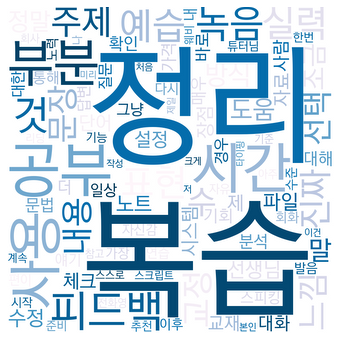

In [37]:
image = visualize_in(noun_list2)
#plt.show(image)

plt.figure(figsize=(6,6)) #이미지 사이즈 지정
plt.imshow(image, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()  # 워드클라우드 이미지 확인
#plt.savefig()